# Super Store Sales Data Analysis

## Goal

Goal of this has to analyze and Know about what is going in the Sales, Product Preference around Customer and with different geographies, and Customer Behaviour while Purchasing Items and Goods

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Superstoredata.csv',parse_dates=['Order Date','Ship Date'])

### Data Cleaning and Wranling

My First step is always to remove outliers, error in data points, and Incorrect Type of data

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Droping Columns which are not usefull during Analysis

In [4]:
df.drop(['Row ID','Order ID','Product ID','Postal Code','Customer ID'],axis=1,inplace=True)

In [5]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [6]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Our Data has zero Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9800 non-null   datetime64[ns]
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   object        
 3   Customer Name  9800 non-null   object        
 4   Segment        9800 non-null   object        
 5   Country        9800 non-null   object        
 6   City           9800 non-null   object        
 7   State          9800 non-null   object        
 8   Region         9800 non-null   object        
 9   Category       9800 non-null   object        
 10  Sub-Category   9800 non-null   object        
 11  Product Name   9800 non-null   object        
 12  Sales          9800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(10)
memory usage: 995.4+ KB


In [8]:
df.describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [9]:
df2 = df[df.Sales < 1000]

In [10]:
df2.shape

(9338, 13)

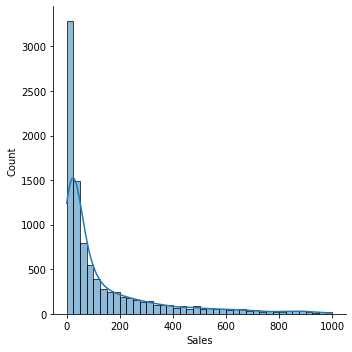

In [11]:
sns.displot(df2.Sales,bins=40,kde=True)

In [12]:
df2['Ship Mode'].value_counts()

Standard Class    5590
Second Class      1811
First Class       1431
Same Day           506
Name: Ship Mode, dtype: int64

In [13]:
df2['Segment'].value_counts()

Consumer       4877
Corporate      2804
Home Office    1657
Name: Segment, dtype: int64

In [14]:
city = list(df2.City.value_counts()[:60].index)
remaining_cities = list(df2.City.value_counts()[60:].index)

In [15]:
df3 = df2[df2.City.isin(city)]
df3_remaining =  df2[df2.City.isin(remaining_cities)]  # Just for the sake for deep analysis

In [16]:
df3.State.value_counts()

California        1461
New York           937
Texas              704
Pennsylvania       521
Washington         397
Illinois           351
Ohio               324
Florida            159
Michigan           148
North Carolina     142
Arizona            120
Virginia           113
Kentucky           108
Georgia             99
Colorado            96
Tennessee           94
Maryland            90
Delaware            80
Indiana             73
Oregon              65
Massachusetts       47
Missouri            45
Wisconsin           44
Mississippi         33
South Carolina      29
Rhode Island        27
Nebraska            26
Minnesota           23
Alabama             21
New Jersey          20
Connecticut         19
Louisiana           16
New Hampshire       15
Arkansas            13
Nevada               2
Name: State, dtype: int64

In [17]:
df4 = df3[-(df3.State=='Nevada')]

In [18]:
df4.Region.value_counts()

West       2139
East       2080
Central    1414
South       827
Name: Region, dtype: int64

In [19]:
df4.Category.value_counts()

Office Supplies    4010
Furniture          1323
Technology         1127
Name: Category, dtype: int64

In [20]:
df4.Country.unique()

array(['United States'], dtype=object)

In [21]:
df4.drop('Country',axis=1,inplace=True)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df4['Sub-Category'].value_counts()

Binders        1003
Paper           938
Furnishings     621
Storage         565
Phones          559
Art             522
Accessories     494
Chairs          379
Appliances      302
Labels          249
Tables          188
Envelopes       164
Fasteners       145
Bookcases       135
Supplies        122
Machines         55
Copiers          19
Name: Sub-Category, dtype: int64

In [23]:
df4.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [24]:
df4['Order Date'].dt.year.unique()

array([2017, 2015, 2018, 2016], dtype=int64)

We have about 4 years of Sales Data

In [25]:
df4['Ship Date'].dt.year.unique()

array([2017, 2015, 2018, 2016, 2019], dtype=int64)

Ship Date has an Extra year 2019 may be an Outlier

In [26]:
df4[df4['Ship Date'].dt.year == 2019]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
270,2018-12-28,2019-02-01,Second Class,Kristen Hastings,Corporate,San Francisco,California,West,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,725.840
570,2018-12-28,2019-04-01,Standard Class,Jennifer Ferguson,Consumer,New York City,New York,East,Office Supplies,Labels,Avery 473,72.450
571,2018-12-28,2019-04-01,Standard Class,Jennifer Ferguson,Consumer,New York City,New York,East,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960
572,2018-12-28,2019-04-01,Standard Class,Jennifer Ferguson,Consumer,New York City,New York,East,Office Supplies,Binders,Storex Dura Pro Binders,33.264
573,2018-12-28,2019-04-01,Standard Class,Jennifer Ferguson,Consumer,New York City,New York,East,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850
645,2018-12-30,2019-05-01,Standard Class,Chuck Clark,Home Office,Columbus,Indiana,Central,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
906,2018-12-30,2019-03-01,Standard Class,Patrick O'Donnell,Consumer,New York City,New York,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
907,2018-12-30,2019-03-01,Standard Class,Patrick O'Donnell,Consumer,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.930
908,2018-12-30,2019-03-01,Standard Class,Patrick O'Donnell,Consumer,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
1296,2018-12-30,2019-03-01,Standard Class,Erica Bern,Corporate,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904


Actually the Order which are ordered at the end of 2018 are shipped in 2019.

In [27]:
df4.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


#### Feature Engineering

In [28]:
year = df4['Order Date'].dt.year
month = df4['Order Date'].dt.month_name()
day = df4['Order Date'].dt.day_name()

In [29]:
df4['Year'] = year
df4['Month'] = month 
df4['Day'] = day

<ipython-input-29-6987eb0ce21b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Year'] = year
<ipython-input-29-6987eb0ce21b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Month'] = month
<ipython-input-29-6987eb0ce21b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [30]:
df4.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Year,Month,Day
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,August,Friday
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,August,Friday
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,December,Wednesday
5,2015-09-06,2015-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,2015,September,Sunday
6,2015-09-06,2015-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.28,2015,September,Sunday


### Exploratory Data Analysis

In [31]:
df4.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Year,Month,Day
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,August,Friday
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,August,Friday
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,December,Wednesday
5,2015-09-06,2015-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,2015,September,Sunday
6,2015-09-06,2015-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.28,2015,September,Sunday


c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Sales'>

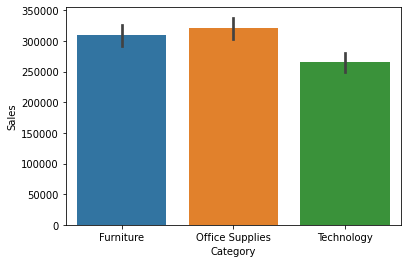

In [32]:
sns.barplot('Category','Sales',data=df4,estimator=sum)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='Sales'>

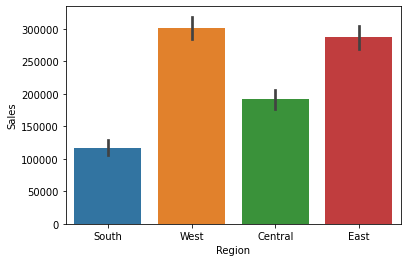

In [33]:
sns.barplot('Region','Sales',data=df4,estimator=sum)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


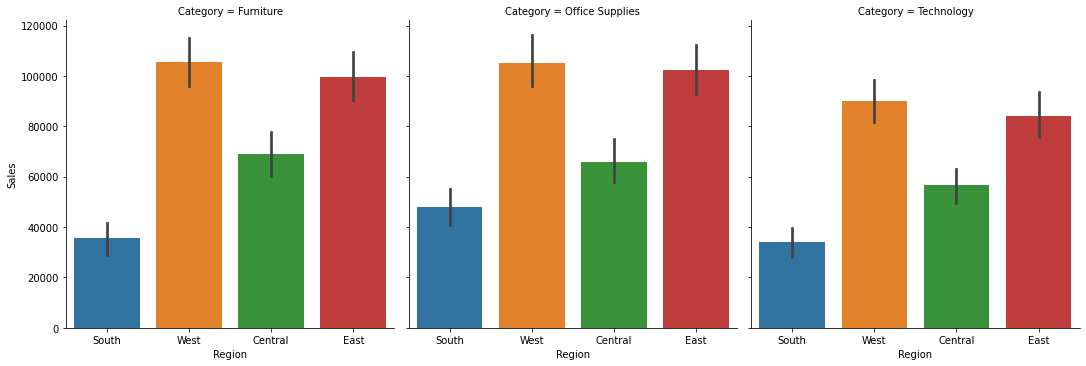

In [34]:
sns.catplot('Region','Sales',data=df4,estimator=sum,kind='bar',col='Category',col_wrap=3)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='Sales'>

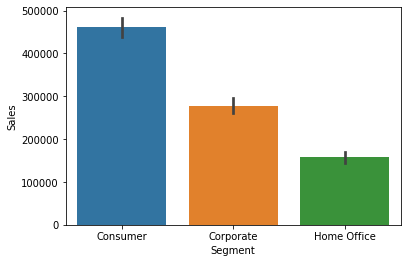

In [35]:
sns.barplot('Segment','Sales',data=df4,estimator=sum)

Consumer Segment are generating more sales, which means that our most of Purchases is done by simple customers

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

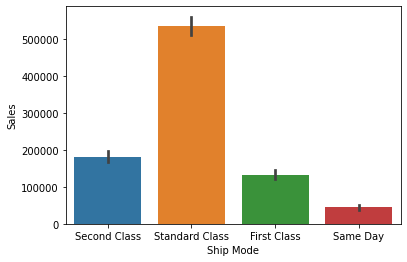

In [36]:
sns.barplot('Ship Mode','Sales',data=df4,estimator=sum)

As mentioned in the Upper Graph, Our Most of the Sales is generated by Normal, and Individual Customers, so the use of standard Class mentioned in the graph is increased

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

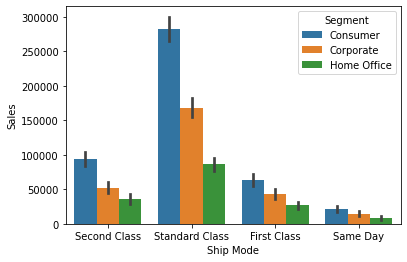

In [37]:
sns.barplot('Ship Mode','Sales',data=df4,estimator=sum,hue='Segment')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Sales'>

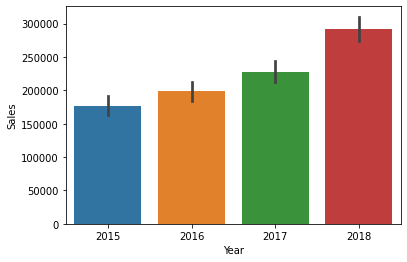

In [38]:
sns.barplot('Year','Sales',data=df4,estimator=sum)

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Month'>

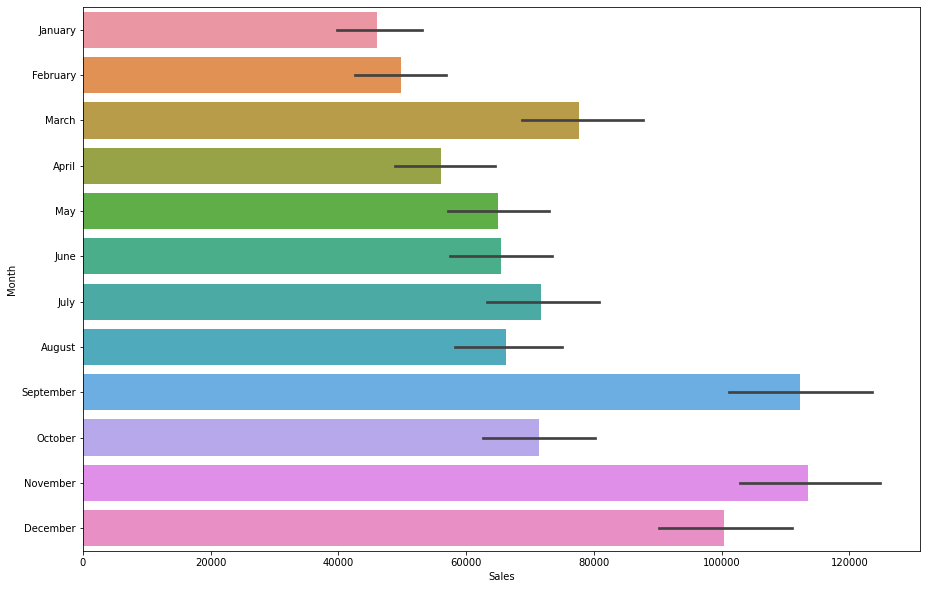

In [39]:
plt.figure(figsize=(15,10))
sns.barplot('Sales','Month',data=df4,estimator=sum,order=['January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'])


In the starting of year Sales is low, which gradualy increasing with the time, but in March, September, November and December, there is Incline in Sales

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

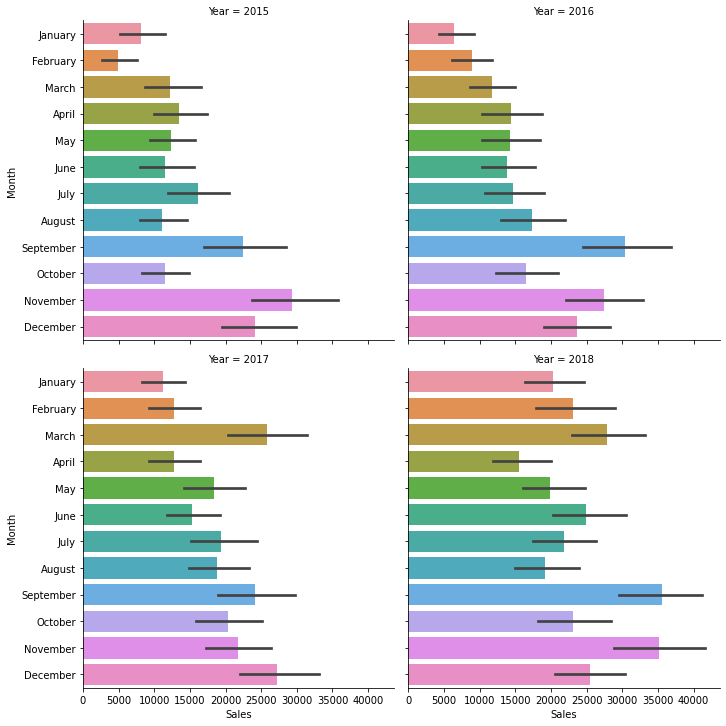

In [40]:
plt.figure(figsize=(15,10))
sns.catplot('Sales','Month',data=df4,estimator=sum,order=['January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],kind='bar',col='Year',col_wrap=2)

If We Analyze Chart separately  throughout the different years, there is a pattern in Every Year, that in the last of the year sales are inclining, mosly in September, November and December, while last two year which are 2017 and 2018 have Inclined Sales in March.

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

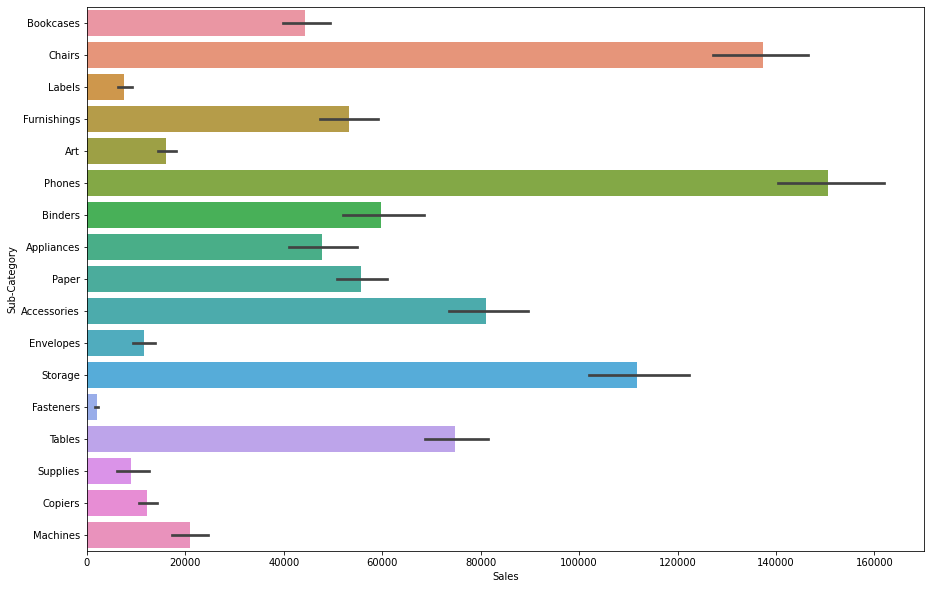

In [41]:
plt.figure(figsize=(15,10))
sns.barplot('Sales','Sub-Category',data=df4,estimator=sum)

Phones are more Sales Generating Item

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Day'>

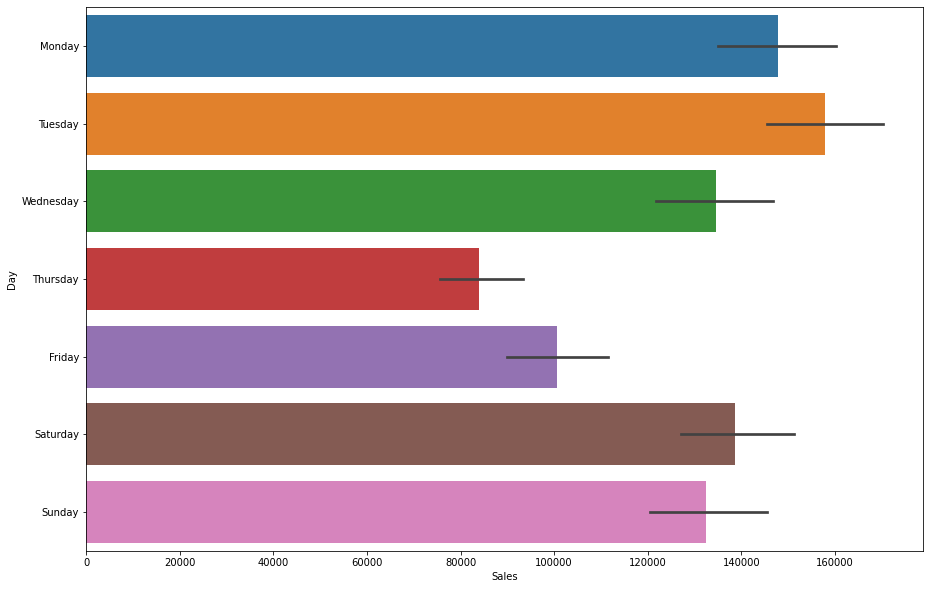

In [42]:
plt.figure(figsize=(15,10))
sns.barplot('Sales','Day',data=df4,estimator=sum,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Here we can see Friday and Thursday have less Sales, than Other Days

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Sales'>

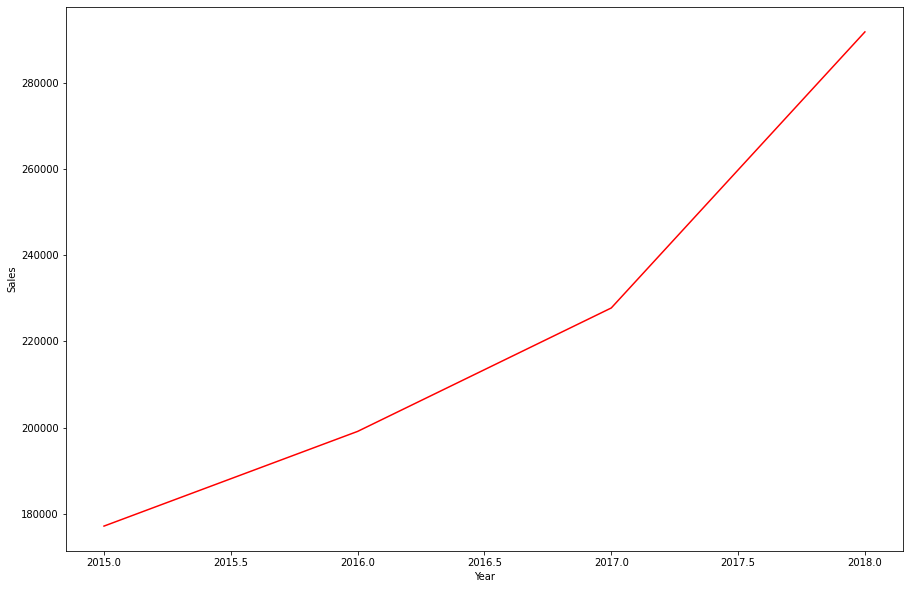

In [43]:
plt.figure(figsize=(15,10))
sns.lineplot('Year','Sales',data=df4,estimator=sum,ci=None,color='red')

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Sales'>

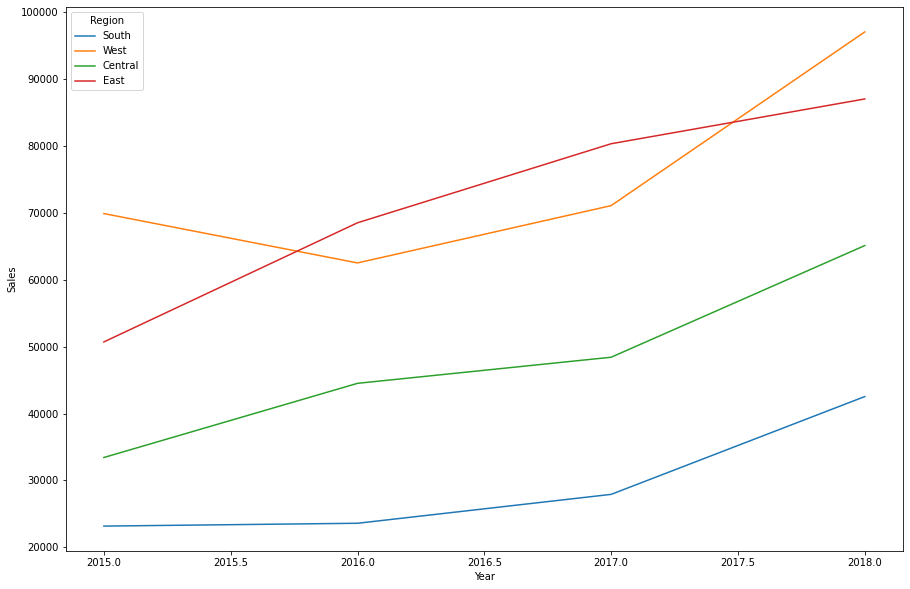

In [44]:
plt.figure(figsize=(15,10))
sns.lineplot('Year','Sales',data=df4,estimator=sum,ci=None,color='red',hue='Region')

In Every Region Sales are Inclining 

Here we can Clearly see that sales are in Inclining Trend

In [45]:
print(f'Total Sales is {int(df4.Sales.sum())}')

Total Sales is 895863


<Figure size 2160x2880 with 0 Axes>

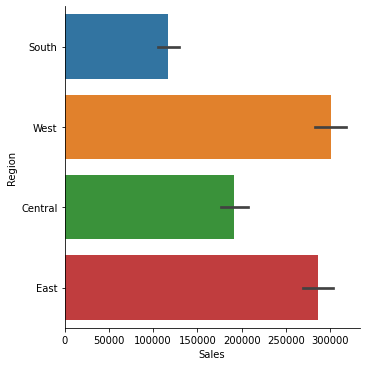

In [46]:
plt.figure(figsize=(30,40))
sns.catplot(y = 'Region',x = 'Sales',data=df4,kind='bar',estimator=sum)
plt.show()

we can clearly see that West and East have More Sales than South and Central.

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


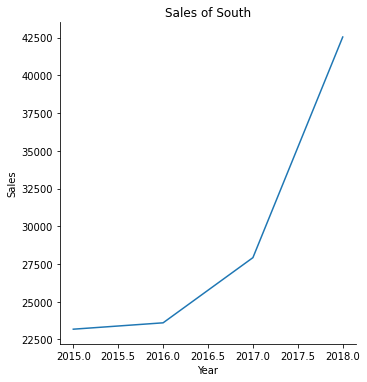

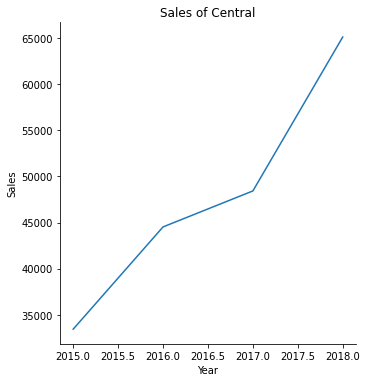

In [47]:
sns.relplot('Year','Sales',data=df4[df4.Region == 'South'],estimator=sum,ci=None,kind='line',)
plt.title('Sales of South')

sns.relplot('Year','Sales',data=df4[df4.Region == 'Central'],estimator=sum,ci=None,kind='line',)
plt.title('Sales of Central')
plt.show()

After Analyzing Data, I have Concluded that South and Central Sales are Less Then East and West but South and Central Sales are showing Inclining Trend, Which is good

<Figure size 2160x2880 with 0 Axes>

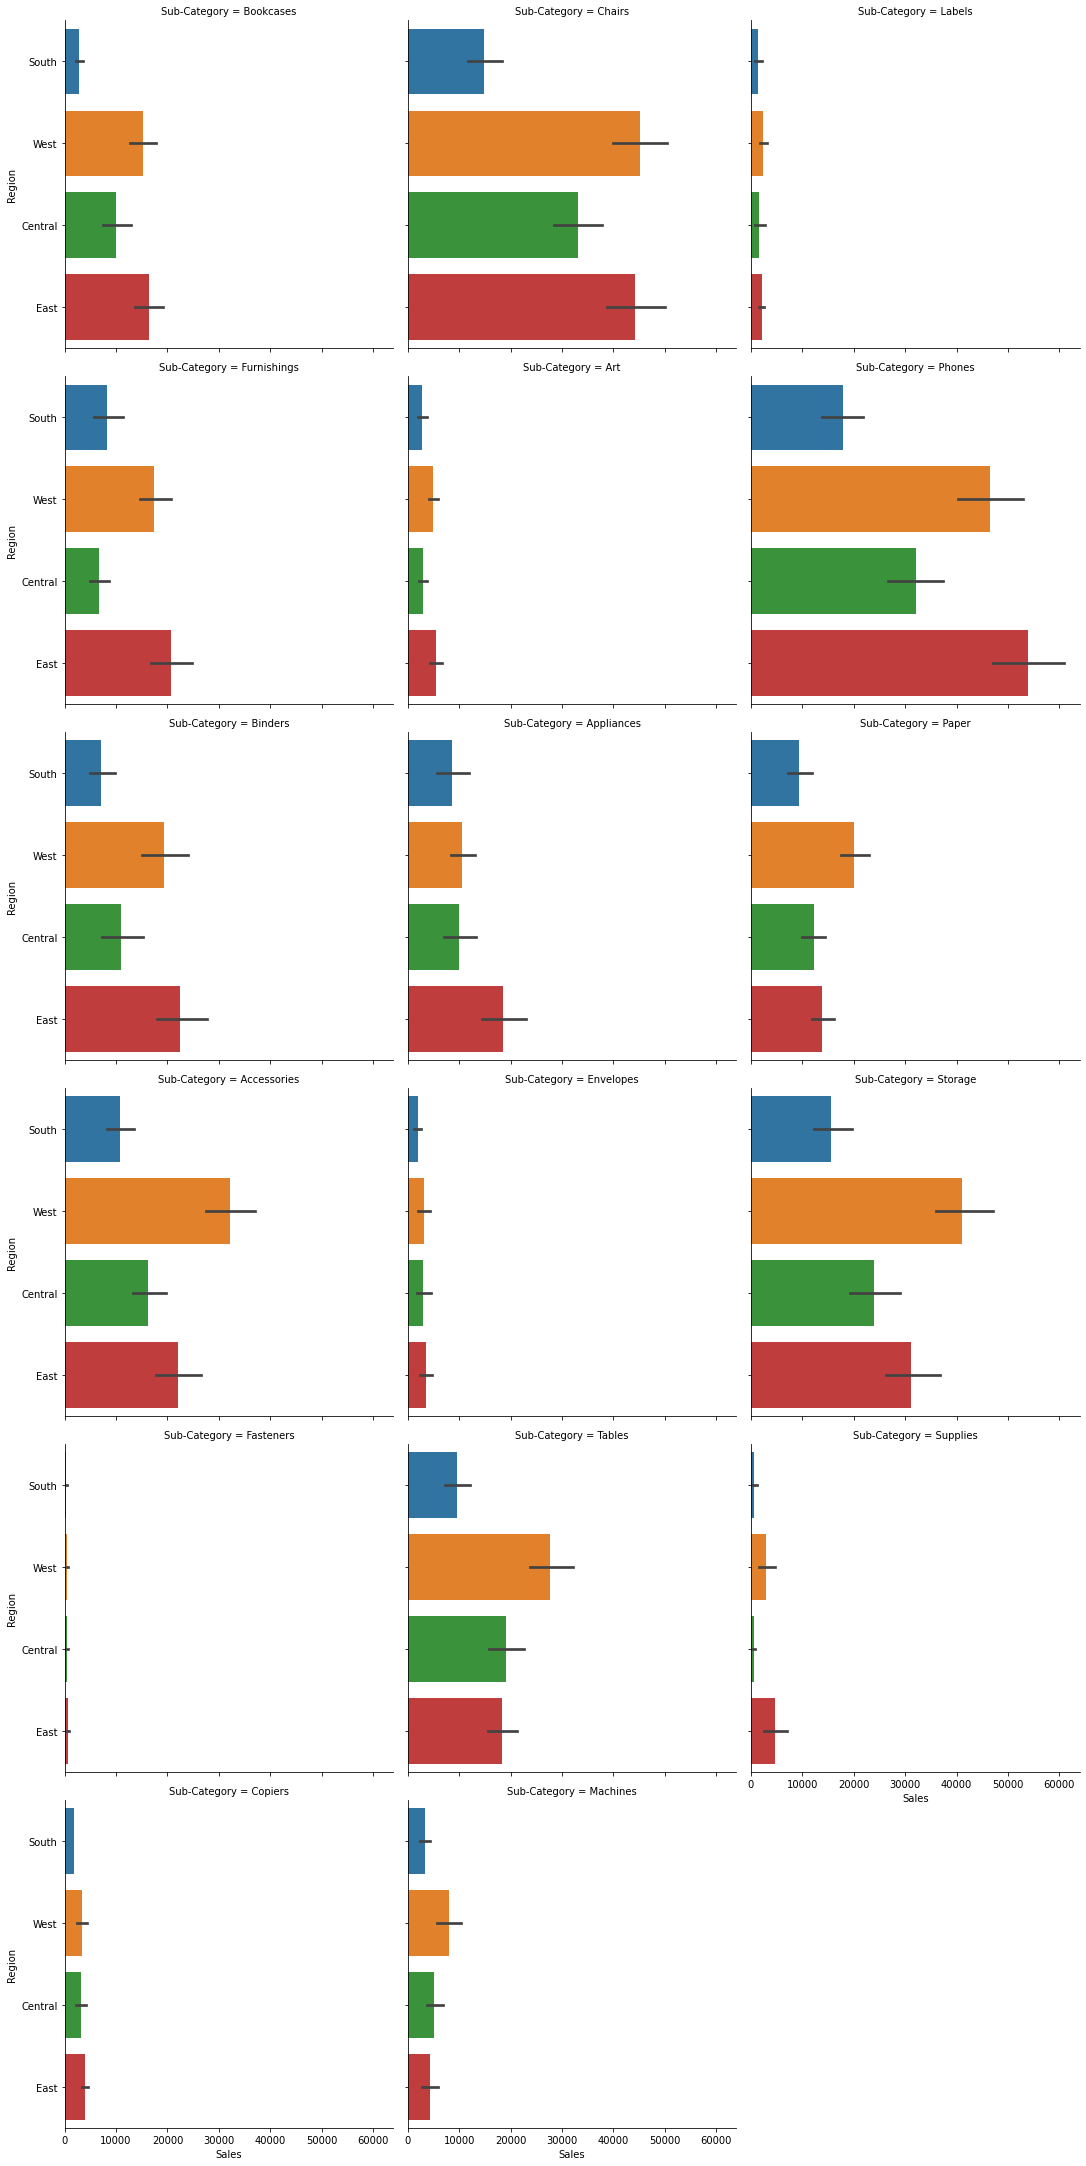

In [48]:
plt.figure(figsize=(30,40))
sns.catplot(y = 'Region',x = 'Sales',data=df4,kind='bar',estimator=sum,col='Sub-Category',col_wrap=3)
plt.show()

if we drill down to the Sub-category and Regional Behaviour, so there is constant pattern going on, in which West and East has more Sales than Central and South

c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='State'>

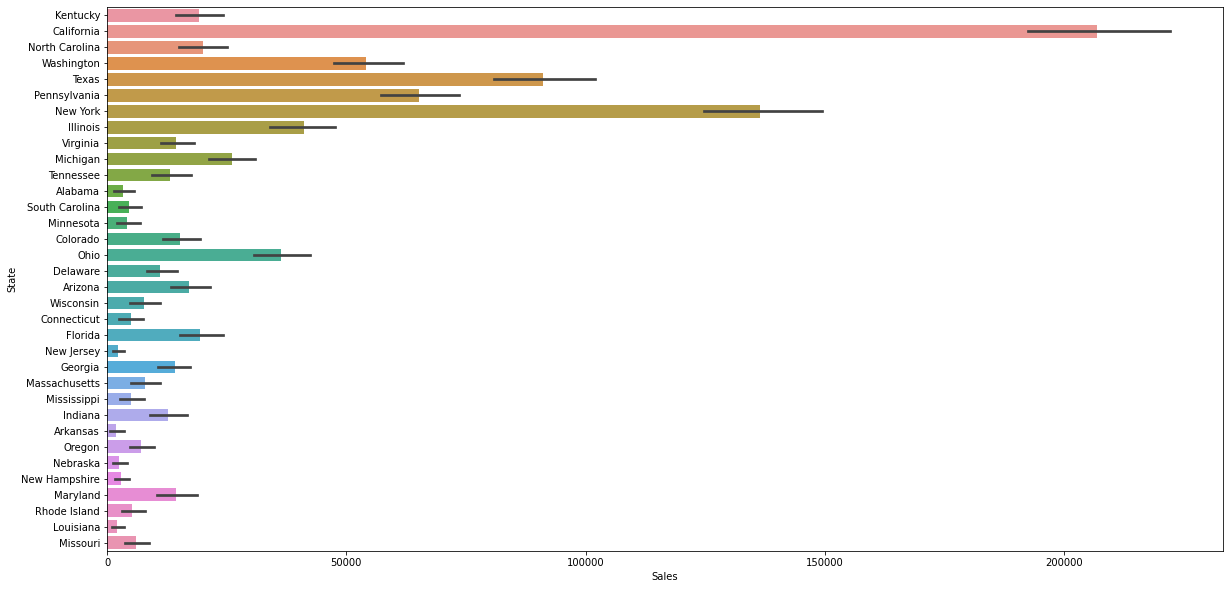

In [49]:
plt.figure(figsize=(20,10))
sns.barplot('Sales','State',data=df4,estimator=sum)

Most Sales generating State is California and then New York and then Texas, and the least ones are Louisiana, Arkanasas, New Jersey

In [50]:
cal = list(df4[df4.State == 'California'].City.unique())
new = list(df4[df4.State == 'New York'].City.unique())
tex = list(df4[df4.State == 'Texas'].City.unique())
for i in range(3):
    if i == 0:
        print(f'California has These Cities: \n{cal}\n')
    elif i == 1:
        print(f'New York has These Cities: \n{new}\n')
    elif i == 2:
        print(f'Texas has These Cities: \n{tex}\n')

California has These Cities: 
['Los Angeles', 'San Francisco', 'Roseville', 'Pasadena', 'San Jose', 'San Diego', 'Long Beach', 'Concord', 'Lancaster', 'Oceanside', 'Fairfield', 'Lakewood']

New York has These Cities: 
['New York City', 'Troy', 'Rochester', 'Oceanside', 'Long Beach']

Texas has These Cities: 
['Fort Worth', 'Houston', 'San Antonio', 'Dallas', 'Pasadena', 'Austin', 'Huntsville', 'Arlington']



c:\users\memon\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='City'>

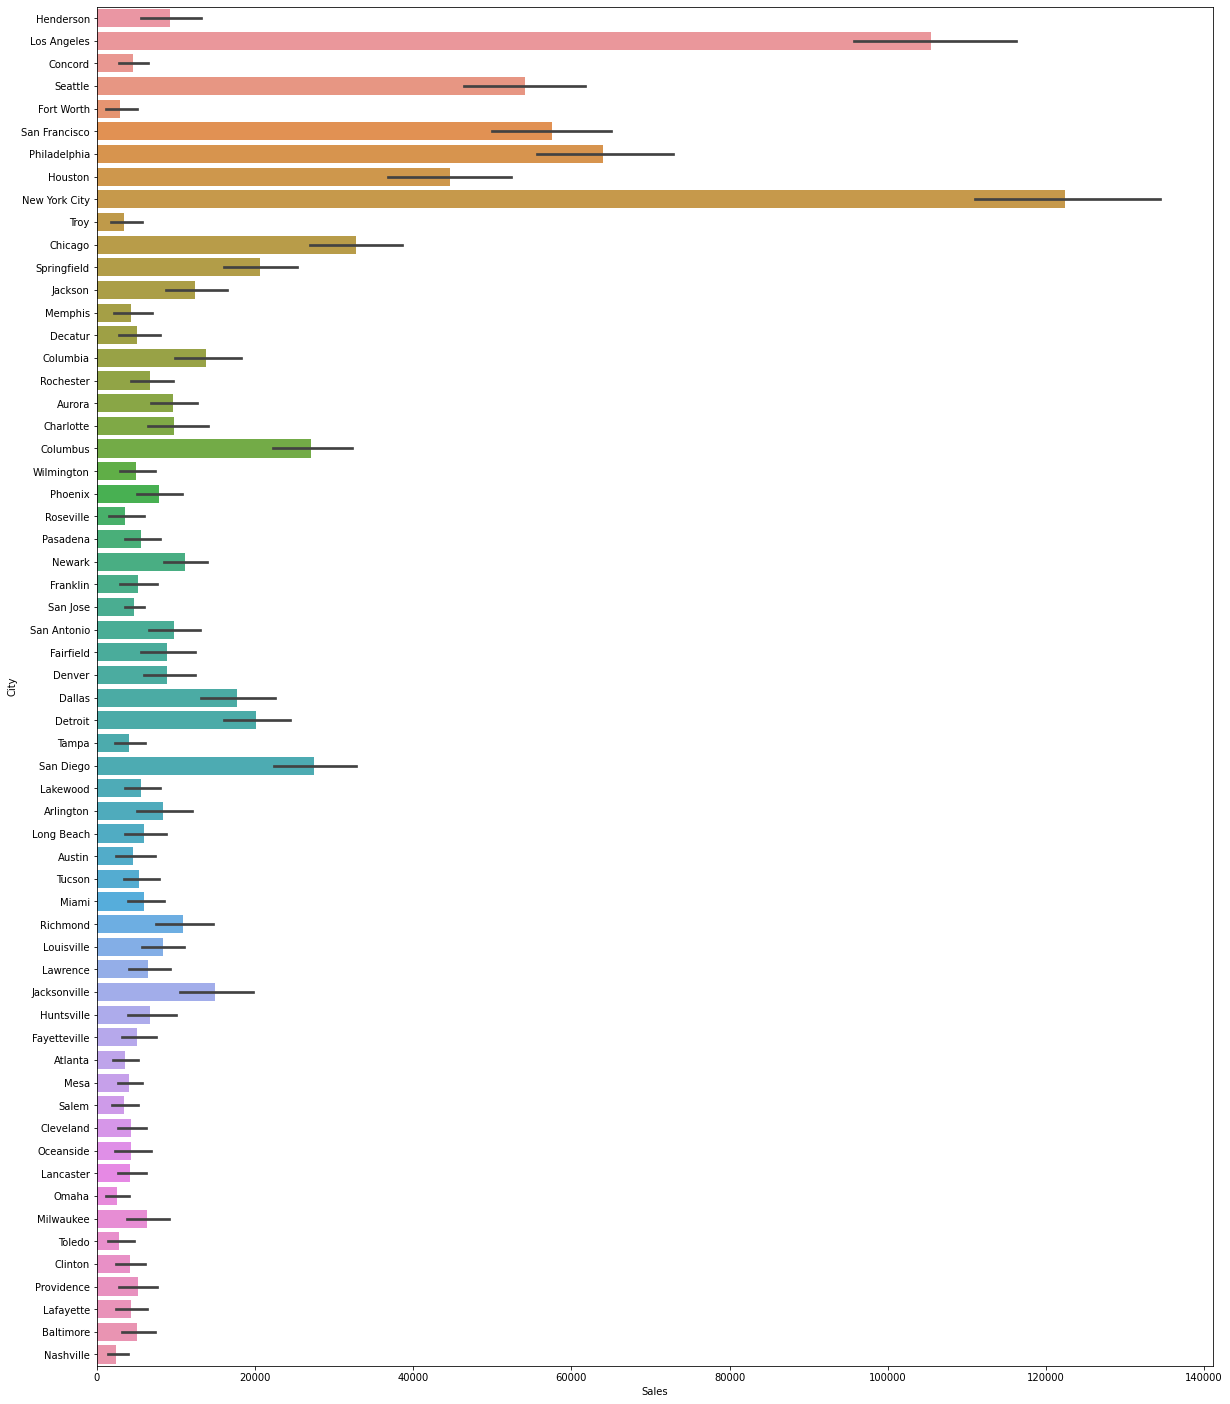

In [51]:
plt.figure(figsize=(20,25))
sns.barplot('Sales','City',data=df4,estimator=sum)

Previous we check that which state have more sales, now we check in those State which city have more sales, In California, Los Angeles have more Sales, In New York, New York City has more Sales, and In Texas Houston have more Sales.

So Lets Analyze What they are buying

In [52]:
Top_Customer = df.groupby('Customer Name').sum().sort_values('Sales',ascending=False).head(10)

Text(0.5, 1.0, 'Our Top 10 Customers')

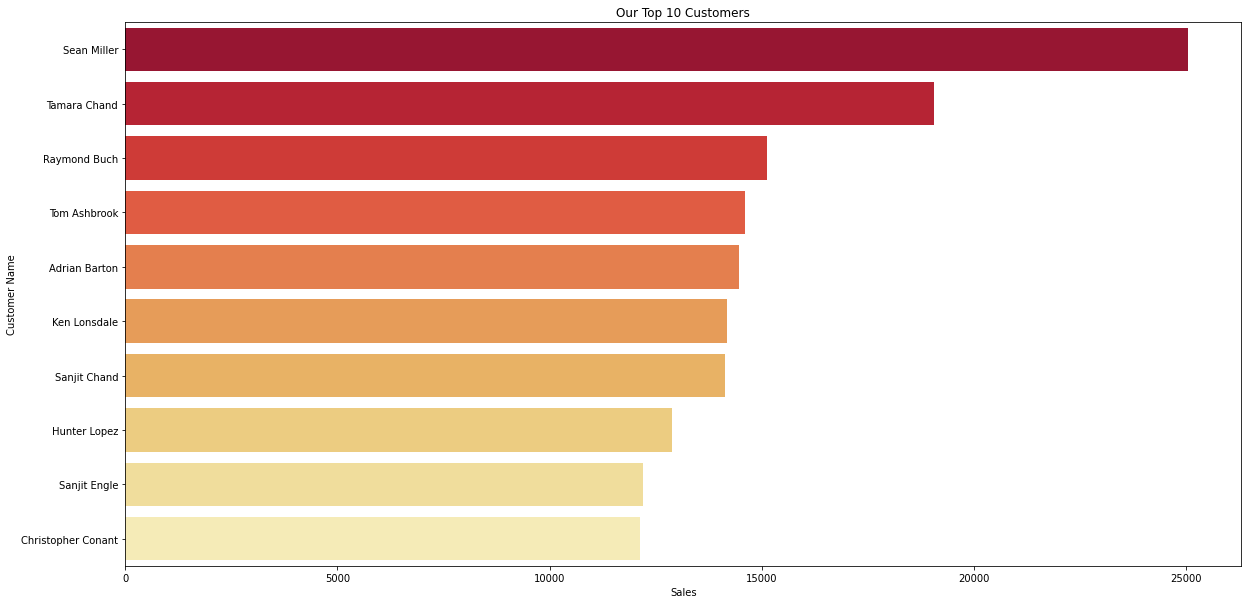

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(y= Top_Customer.index,x =Top_Customer.Sales,palette = "YlOrRd_r")
plt.title('Our Top 10 Customers')

## The End